Import train and test dataset on which we need to perform the analysis.

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_train = pd.read_csv("D:\\Tarun\\UTS\\Subjects\\ADV ML\\NBA-Drafted-Player\\src\\models\\train.csv")
df_test = pd.read_csv("D:\\Tarun\\UTS\\Subjects\\ADV ML\\NBA-Drafted-Player\\src\\models\\test.csv")

In [130]:
df_train.head(5)

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,type,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,10,14,0.714,26,68,0.382,13,39,0.333,0.3,1.5,13.1,So,2-Jun,NaN,0.258086,89.3938,2.5,2009,all,NaN,1.823646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.321,108.527,0.893017,49.9644,-4.995140,-1.623360,-3.371780,-4.723150,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,7be2aead-da4e-4d13-a74b-4c1e692e2368,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,30,45,0.667,56,113,0.496,20,51,0.392,1.0,1.1,27.4,So,4-Jun,NaN,1.334920,100.0660,3.4,2009,all,NaN,1.631621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.078,104.017,1.880030,111.9290,0.593024,1.385490,-0.792469,-0.300196,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,61de55d9-1582-4ea4-b593-44f6aa6524a6,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,45,67,0.672,67,157,0.427,50,154,0.325,0.0,0.9,21.5,Sr,4-Jun,NaN,2.274070,104.1070,1.7,2009,all,NaN,1.081662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.556,102.154,2.763870,115.0210,0.003161,1.024770,-1.021610,0.665065,33.1852,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,efdc4cfc-9dd0-4bf8-acef-7273e4d5b655,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,14,27,0.519,25,63,0.397,28,62,0.452,0.8,1.9,21.6,Sr,4-Jun,NaN,0.552857,93.2086,2.0,2009,all,NaN,0.942830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.858,106.556,1.218710,84.1698,-0.977798,-0.502574,-0.475224,-0.736233,17.9667,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,14f05660-bb3c-4868-b3dd-09bcdb64279d,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,64,114,0.561,93,176,0.528,0,0,0.000,1.9,1.3,64.8,Sr,8-Jun,NaN,1.060130,97.8554,3.8,2009,all,NaN,0.491229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.052,100.724,1.992790,128.0280,-1.836060,-1.946040,0.109983,-2.353180,22.9091,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,a58db52f-fbba-4e7b-83d0-371efcfed039,0.0


Analyse the dataset and its features. This will help to understand which features we need to select for the model.

In [131]:
print(df_train.shape)
print(df_test.shape)

(56091, 64)
(4970, 63)


In [132]:
df_train.dtypes

team                    object
conf                    object
GP                       int64
Min_per                float64
Ortg                   float64
usg                    float64
eFG                    float64
TS_per                 float64
ORB_per                float64
DRB_per                float64
AST_per                float64
TO_per                 float64
FTM                      int64
FTA                      int64
FT_per                 float64
twoPM                    int64
twoPA                    int64
twoP_per               float64
TPM                      int64
TPA                      int64
TP_per                 float64
blk_per                float64
stl_per                float64
ftr                    float64
yr                      object
ht                      object
num                     object
porpag                 float64
adjoe                  float64
pfr                    float64
year                     int64
type                    object
Rec_Rank

Replace the None object values to NA for the missing data treatment.

In [133]:
df_train = df_train.replace('None', pd.NA)
df_test = df_test.replace('None', pd.NA)

Check the missing data features with the count of missing data values. This will help to understand which columns needs to be treated for missing data.

In [143]:
df_train.isna().sum()

GP                 0
Min_per            0
Ortg               0
usg                0
eFG                0
TS_per             0
ORB_per            0
DRB_per            0
AST_per            0
TO_per             0
FTM                0
FTA                0
FT_per             0
twoPM              0
twoPA              0
twoP_per           0
TPM                0
TPA                0
TP_per             0
blk_per            0
stl_per            0
ftr                0
porpag             0
adjoe              0
pfr                0
year               0
ast_tov            0
rimmade            0
rimmade_rimmiss    0
midmade            0
midmade_midmiss    0
rim_ratio          0
mid_ratio          0
drtg               0
adrtg              0
dporpag            0
stops              0
bpm                0
obpm               0
dbpm               0
gbpm               0
mp                 0
ogbpm              0
dgbpm              0
oreb               0
dreb               0
treb               0
ast          

In [135]:
cols_to_drop = ['Rec_Rank', 'dunksmade', 'dunksmiss_dunksmade', 'dunks_ratio', 'pick', 'team', 'conf', 'yr', 'ht', 'type', 'num']

Now, for the preprocessing and feature selection, I have dropped some of the irrelevant features.

**yr** - student year of study. AS we are comparing the matches and goals, so year of study is not needed for analysis.

**ht** - height of student. Height of student does not matters to analyse its performance.

**Rec_Rank** - majority of the data is NAN so we can drop this feature as it is containing barely any information.

**dunks_ratio** - again, majority of the data is NAN, so have dropped and its corresponding columns.

Some other columns have dropped based on the missing data and feature irrelevant for the target variable.

In [136]:
df_train = df_train.drop(df_train.columns.intersection(cols_to_drop), axis=1)
df_test = df_test.drop(df_test.columns.intersection(cols_to_drop), axis=1)

Now, check the missing data columns in the assending order which needs to get a treatment.

In [138]:
missing_data_train = df_train.isna().sum().sort_values(ascending=False)
missing_data_test = df_test.isna().sum().sort_values(ascending=False)

In [139]:
missing_data_train

mid_ratio          9688
rim_ratio          9464
rimmade_rimmiss    6081
rimmade            6081
midmade            6081
midmade_midmiss    6081
ast_tov            4190
bpm                  44
dbpm                 44
drtg                 44
adrtg                44
dporpag              44
stops                44
obpm                 44
gbpm                 44
ogbpm                44
dgbpm                44
ast                  38
dreb                 38
mp                   38
oreb                 38
stl                  38
blk                  38
pts                  38
treb                 38
player_id             0
GP                    0
Min_per               0
year                  0
Ortg                  0
usg                   0
eFG                   0
TS_per                0
ORB_per               0
DRB_per               0
AST_per               0
TO_per                0
FTM                   0
FTA                   0
FT_per                0
twoPM                 0
twoPA           

For the missing values, I have replaced the missing values to mean of the feature.

In [140]:
def remove_missing_data(col, df):
    df[col] = df[col].fillna(df[col].mean())
    return df

In [141]:
def missing_data_treatment(missing_data, df):
    i = 0
    while missing_data.values[i] > 0:
        df = remove_missing_data(missing_data.keys()[i], df)
        i += 1
    return df

In [142]:
df_train = missing_data_treatment(missing_data_train, df_train)
df_test = missing_data_treatment(missing_data_train, df_test)

In [144]:
print(df_train.shape)
print(df_test.shape)

(56091, 53)
(4970, 52)


Seperate the X and Y train dataset and spilt the train dataset into train and test.

In [145]:
df_X_train = df_train.drop('drafted', axis='columns')

In [146]:
df_Y_train = df_train.drafted

As the player_id is in the form of string, Using the LabelEncoder to transform the player_id into numeric.

In [147]:
from sklearn.preprocessing import LabelEncoder
le_player_id = LabelEncoder()

In [148]:
df_X_train['le_player_id'] = le_player_id.fit_transform(df_X_train['player_id'])
df_test['le_player_id'] = le_player_id.fit_transform(df_test['player_id'])

In [149]:
df_player_id_train = df_X_train.player_id
df_player_id_test = df_test.player_id
df_X_train = df_X_train.drop(['player_id'], axis='columns')
df_test = df_test.drop(['player_id'], axis='columns')

In [150]:
df_Y_train.isna().sum()

0

By using train_test_split, divide the train data into train-test dataset.

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_X_train, df_Y_train, train_size=0.8)
X_test.shape

(11219, 52)

Now, use the RandomForestClassifier for the data modelling with n_estimator as 100.

In [154]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

In [155]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [156]:
y_pred = model.predict_proba(X_test)

In [157]:
predicted = model.predict(X_test)

In [158]:
import numpy as np
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
#pd.reset_option('display.float_format')
#y_pred.apply(lambda x: '%.5f' % x, axis=1)

In [159]:
y_pred

array([[1.000000, 0.000000],
       [0.780000, 0.220000],
       [0.990000, 0.010000],
       ...,
       [1.000000, 0.000000],
       [1.000000, 0.000000],
       [1.000000, 0.000000]])

Check the model performance on the test data of train-test split technique.

In [160]:
model.score(X_test, Y_test)

0.9914430876192174

In [161]:
from sklearn.model_selection import cross_val_score
print("cross val score - Logistic Regression - ",
          cross_val_score(LogisticRegression(C=10), df_X_train, df_Y_train, cv = 5))

D:\Tarun\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Tarun\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_o

cross val score - Logistic Regression -  [0.990908 0.991086 0.990640 0.990729 0.990462]


D:\Tarun\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


To measure the accuracy of model, perform the MSE and MAE with the predicted variable and target variable.

In [162]:
from sklearn.metrics import (
    mean_absolute_error, # MAE
    mean_squared_error # MSE
)

In [163]:
MAE = mean_absolute_error(
    y_true=Y_test, # actual values
    y_pred=predicted # predicted values
)
MAE.round(2)

0.01

In [164]:
MSE = mean_squared_error(
    y_true=Y_test, # actual values
    y_pred=predicted # predicted values
)
MSE.round(2)

0.01

Draw the confusion matrix of predicted value and the actual value.

In [165]:
from sklearn.metrics import confusion_matrix

In [166]:
cm = confusion_matrix(Y_test, predicted)
cm

array([[11102,    11],
       [   85,    21]], dtype=int64)

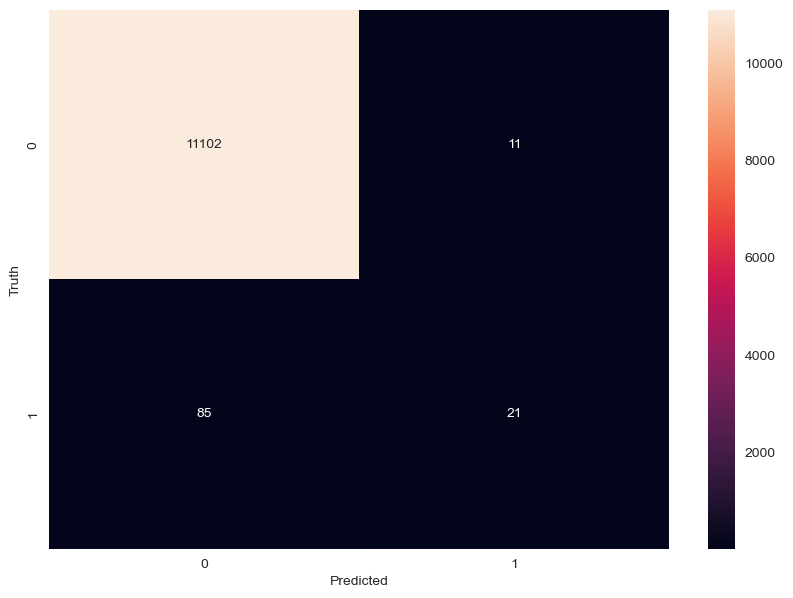

In [167]:
from matplotlib import pyplot as plt
import seaborn as sb
plt.figure(figsize=(10, 7))
sb.heatmap(cm,annot=True,fmt='g')
# sb.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Now, draw AUROC curve to check the performance of the model.

In [168]:
from sklearn.metrics import roc_curve

In [169]:
fpr, tpr, thresh = roc_curve(Y_test, y_pred[:,1], pos_label=1)

In [170]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

In [171]:
from sklearn.metrics import roc_auc_score

In [172]:
auc_score = roc_auc_score(Y_test, y_pred[:,1])

In [173]:
print(auc_score)

0.9706645624960738


In [174]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

D:\Tarun\TemporaryFiles\ipykernel_14820\4098886997.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


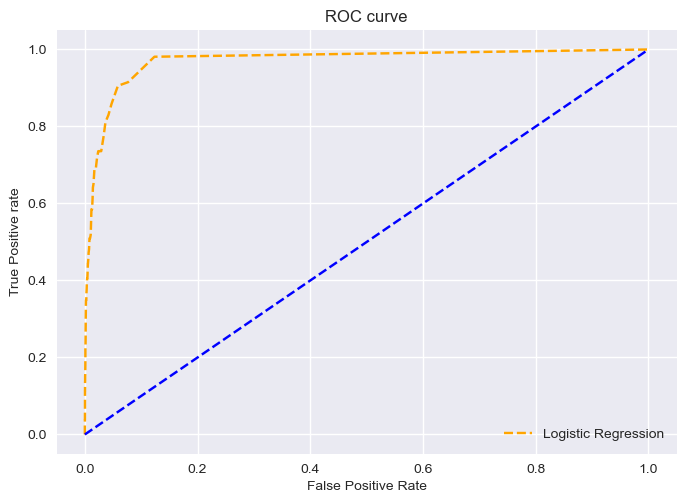

In [175]:
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

Now, predict the target value on the actual test dataset.

In [176]:
y_pred_test = model.predict_proba(df_test)

In [177]:
y_pred_test

array([[1.000000, 0.000000],
       [1.000000, 0.000000],
       [1.000000, 0.000000],
       ...,
       [1.000000, 0.000000],
       [1.000000, 0.000000],
       [1.000000, 0.000000]])

In [178]:
df_result = pd.DataFrame()

In [179]:
df_result['player_id'] = df_player_id_test

In [184]:
df_result.shape

(4970, 2)

In [181]:
df_result['drafted'] = y_pred_test[:,1]

In [183]:
result_csv_data = df_result.to_csv('D:\\Tarun\\UTS\\Subjects\\ADV ML\\advmla-2023-spring\\result_csv_data_comp_2.csv', index = True)